NAME  : RAHINI DEVI S

ROLLNO: 225229129

SMA_LAB-14

## Click Through Rate(CTR) Predictive Model

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/avazu-ctr-prediction/sampleSubmission.gz
/kaggle/input/avazu-ctr-prediction/train.gz
/kaggle/input/avazu-ctr-prediction/test.gz


### Step 1: Download the dataset in kaggle

### Step 2: Explore the data fields

In [5]:
import numpy as np
import random
import pandas as pd
import gzip
num_records = 40428967
sample_size = 5000000
skip_values = sorted(random.sample(range(1,num_records), num_records - sample_size))

train = pd.read_csv("../input/avazu-ctr-prediction/train.gz",skiprows=skip_values)
train.head(2)

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,10004510652136496837,0,14102100,1005,0,543a539e,c7ca3108,3e814130,ecad2386,7801e8d9,...,1,0,20352,320,50,2333,0,39,-1,157
1,10005334911727438633,0,14102100,1010,1,85f751fd,c4e18dd6,50e219e0,ffc6ffd0,7801e8d9,...,4,0,21665,320,50,2493,3,35,-1,117


In [6]:
test = pd.read_csv('../input/avazu-ctr-prediction/test.gz')
test.head(2)

,id,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1.000017e+19,14103100,1005,0,235ba823,f6ebf28e,f028772b,ecad2386,7801e8d9,07d7df22,...,1,0,8330,320,50,761,3,175,100075,23
1,1.000018e+19,14103100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,1,0,22676,320,50,2616,0,35,100083,51


### Step 3: Perform Feature engineering and EDA

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


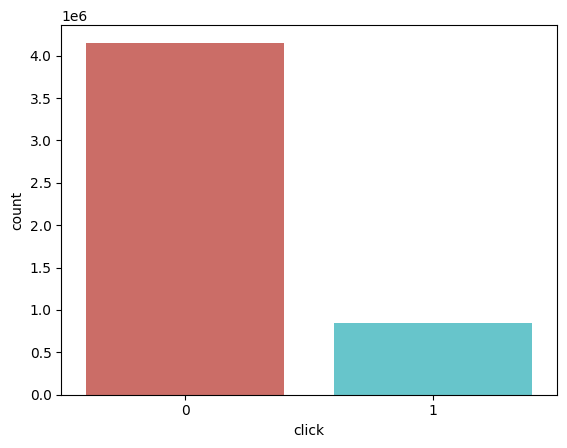

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='click',data=train, palette='hls')
plt.show()

In [8]:
train['click'].value_counts()/len(train)

click
0    0.830359
1    0.169641
Name: count, dtype: float64

Text(0.5, 1.0, 'Number of clicks by hour')

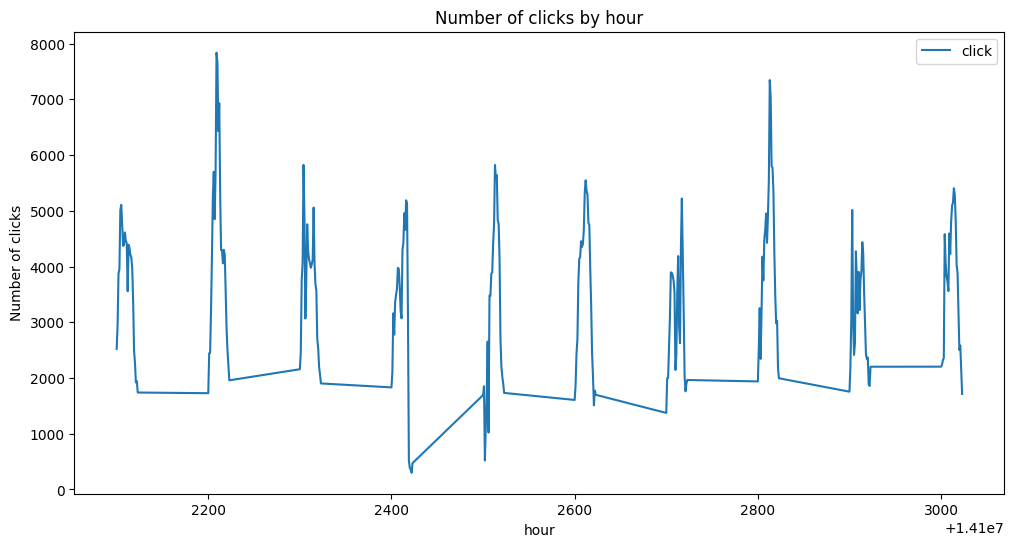

In [9]:
train.groupby('hour').agg({'click':'sum'}).plot(figsize=(12,6))
plt.ylabel('Number of clicks')
plt.title('Number of clicks by hour')

Text(0.5, 1.0, 'click trends by hour of day')

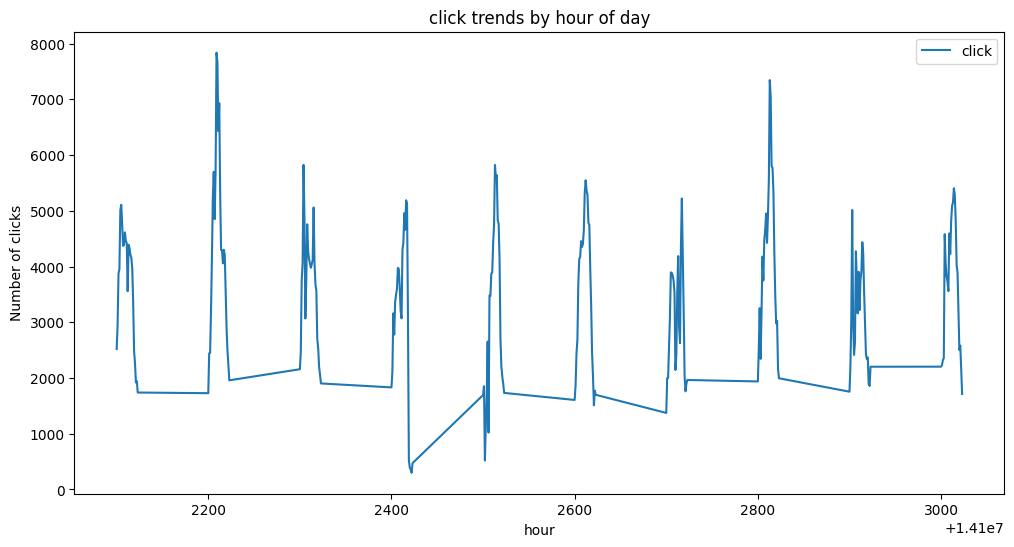

In [12]:
train.groupby('hour').agg({'click':'sum'}).plot(figsize=(12,6))
plt.ylabel('Number of clicks')
plt.title('click trends by hour of day')

### Step 4: While Performing EDA, find the highest click per hour, clicks per day and banner postion through Visualizations

In [18]:
train.columns

Index(['id', 'click', 'hour', 'C1', 'banner_pos', 'site_id', 'site_domain',
       'site_category', 'app_id', 'app_domain', 'app_category', 'device_id',
       'device_ip', 'device_model', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21'],
      dtype='object')

Text(0.5, 1.0, 'Hourly CTR')

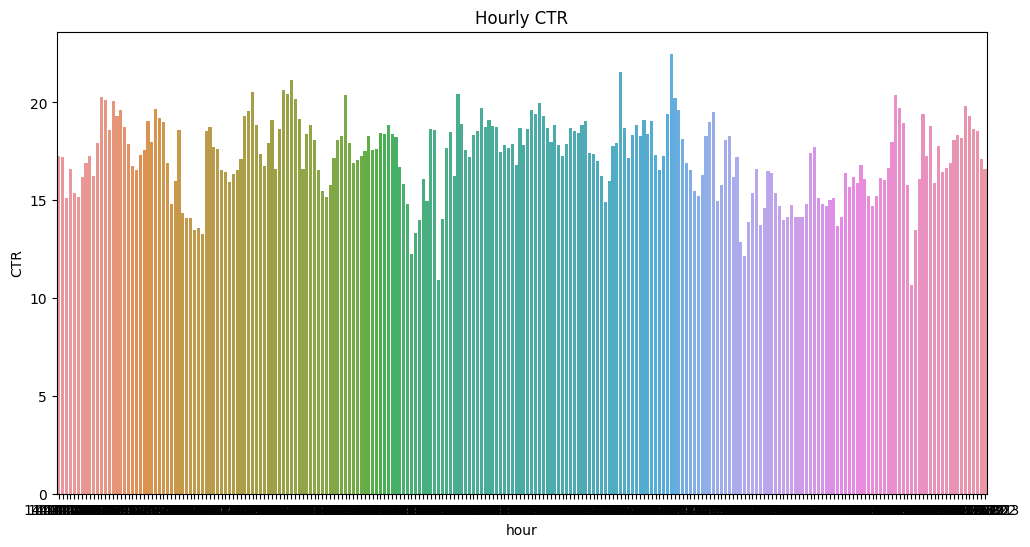

In [19]:
import seaborn as sns
df_click = train[train['click'] == 1]
df_hour = train[['hour','click']].groupby(['hour']).count().reset_index()
df_hour = df_hour.rename(columns={'click': 'impressions'})
df_hour['clicks'] = df_click[['hour','click']].groupby(['hour']).count().reset_index()['click']
df_hour['CTR'] = df_hour['clicks']/df_hour['impressions']*100
plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='hour', data=df_hour)
plt.title('Hourly CTR')

In [23]:
print(train.C1.value_counts()/len(train))

C1
1005    0.918702
1002    0.054849
1010    0.022376
1012    0.002803
1007    0.000893
1001    0.000237
1008    0.000140
Name: count, dtype: float64


In [24]:
C1_values = train.C1.unique()
C1_values.sort()
ctr_avg_list=[]
for i in C1_values:
    ctr_avg=train.loc[np.where((train.C1 == i))].click.mean()
    ctr_avg_list.append(ctr_avg)
    print("for C1 value: {},  click through rate: {}".format(i,ctr_avg))

for C1 value: 1001,  click through rate: 0.033783783783783786
for C1 value: 1002,  click through rate: 0.21114850698103507
for C1 value: 1005,  click through rate: 0.16912869205844422
for C1 value: 1007,  click through rate: 0.0373936408419167
for C1 value: 1008,  click through rate: 0.09571428571428571
for C1 value: 1010,  click through rate: 0.09586886183657782
for C1 value: 1012,  click through rate: 0.17172005421987588


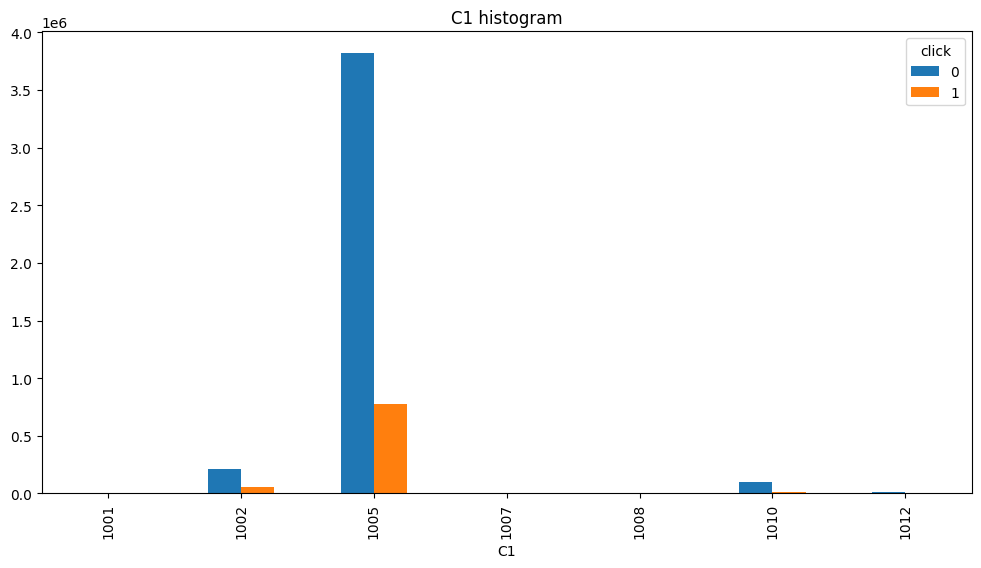

In [25]:
train.groupby(['C1', 'click']).size().unstack().plot(kind='bar', figsize=(12,6), title='C1 histogram');

Text(0.5, 1.0, 'CTR by C1')

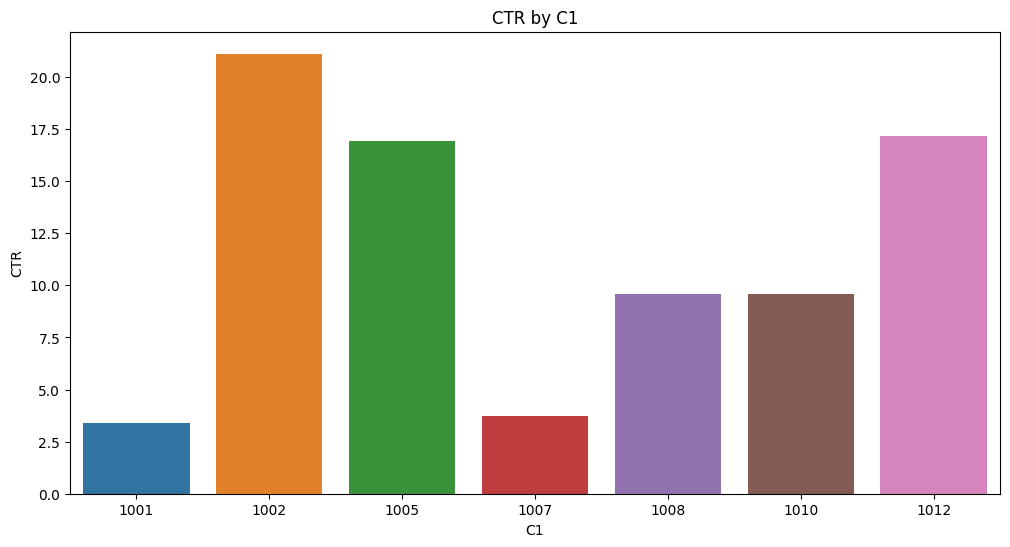

In [26]:
df_c1 = train[['C1','click']].groupby(['C1']).count().reset_index()
df_c1 = df_c1.rename(columns={'click': 'impressions'})
df_c1['clicks'] = df_click[['C1','click']].groupby(['C1']).count().reset_index()['click']
df_c1['CTR'] = df_c1['clicks']/df_c1['impressions']*100
plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='C1', data=df_c1)
plt.title('CTR by C1')

In [27]:
print(train.banner_pos.value_counts()/len(train)) 

banner_pos
0    0.719964
1    0.278240
7    0.001100
2    0.000316
4    0.000188
5    0.000140
3    0.000053
Name: count, dtype: float64


In [28]:
banner_pos = train.banner_pos.unique()
banner_pos.sort()
ctr_avg_list=[]
for i in banner_pos:
    ctr_avg=train.loc[np.where((train.banner_pos == i))].click.mean()
    ctr_avg_list.append(ctr_avg)
    print("for banner position: {},  click through rate: {}".format(i,ctr_avg))

for banner position: 0,  click through rate: 0.164113205660283
for banner position: 1,  click through rate: 0.18341863139735481
for banner position: 2,  click through rate: 0.12103929024081116
for banner position: 3,  click through rate: 0.17803030303030304
for banner position: 4,  click through rate: 0.20425531914893616
for banner position: 5,  click through rate: 0.09585121602288985
for banner position: 7,  click through rate: 0.32005819239861794


<Axes: title={'center': 'banner position histogram'}, xlabel='banner_pos'>

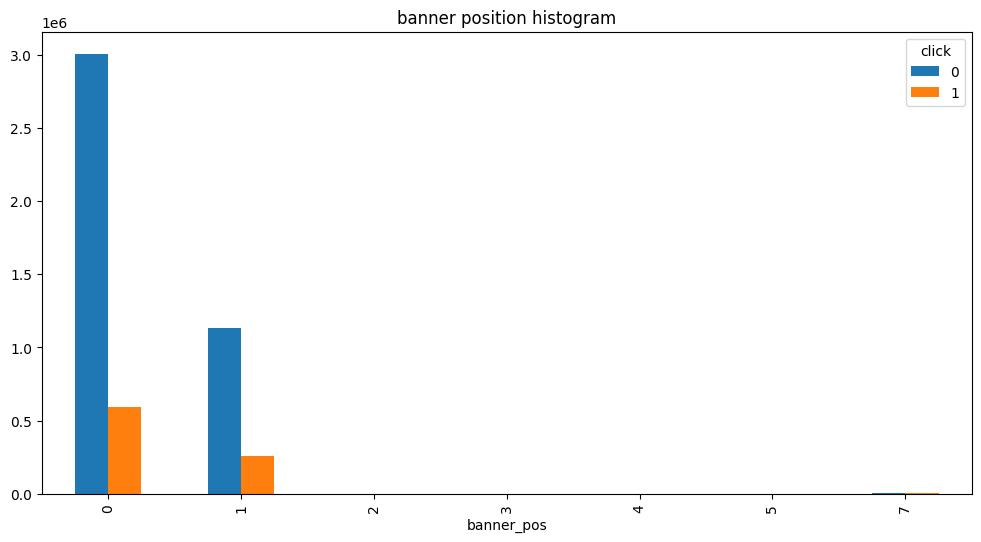

In [29]:
train.groupby(['banner_pos', 'click']).size().unstack().plot(kind='bar', figsize=(12,6), title='banner position histogram')  

Text(0.5, 1.0, 'CTR by banner position')

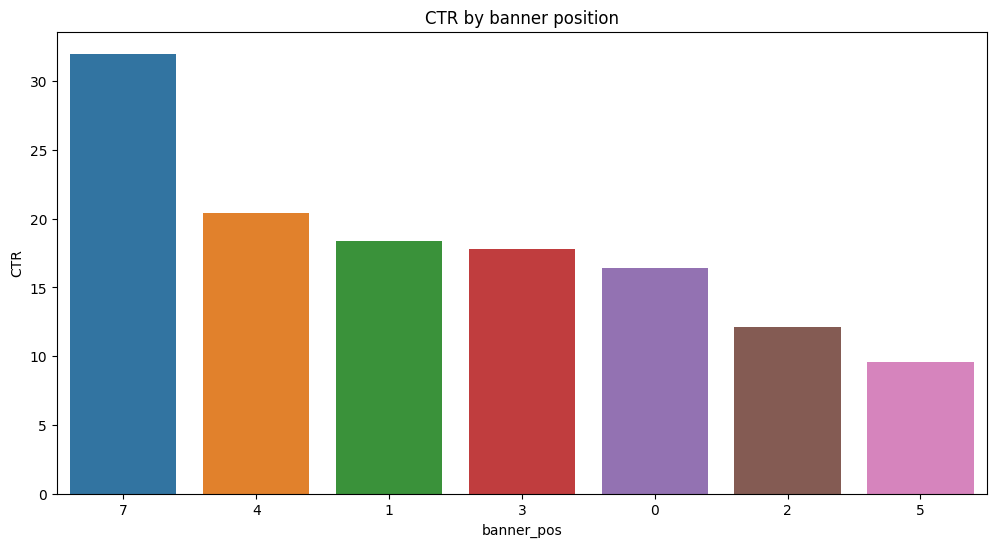

In [30]:
df_banner = train[['banner_pos','click']].groupby(['banner_pos']).count().reset_index()
df_banner = df_banner.rename(columns={'click': 'impressions'})
df_banner['clicks'] = df_click[['banner_pos','click']].groupby(['banner_pos']).count().reset_index()['click']
df_banner['CTR'] = df_banner['clicks']/df_banner['impressions']*100
sort_banners = df_banner.sort_values(by='CTR',ascending=False)['banner_pos'].tolist()
plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='banner_pos', data=df_banner, order=sort_banners)
plt.title('CTR by banner position')

In [31]:
print('The impressions by device types')
print((train.device_type.value_counts()/len(train)))

The impressions by device types
device_type
1    0.922774
0    0.054849
4    0.019146
5    0.003231
2    0.000001
Name: count, dtype: float64


<Axes: title={'center': 'device types'}, xlabel='device_type'>

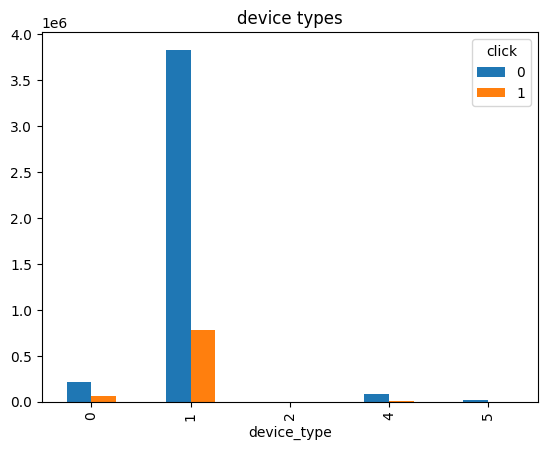

In [32]:
train[['device_type','click']].groupby(['device_type','click']).size().unstack().plot(kind='bar', title='device types')

<Axes: title={'center': 'Clicks from device type 1 by hour of day'}, xlabel='hour'>

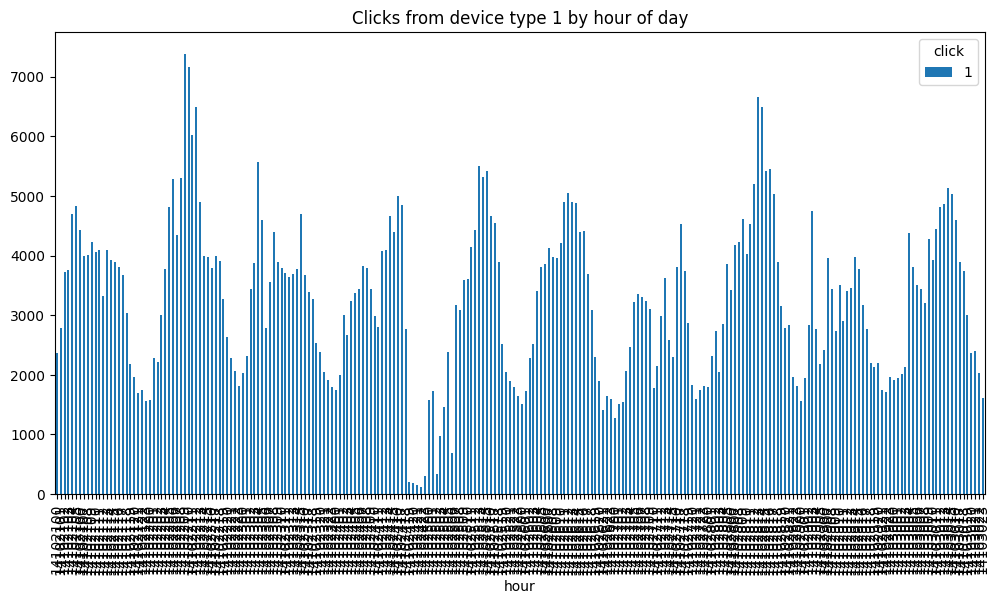

In [34]:
df_click[df_click['device_type']==1].groupby(['hour', 'click']).size().unstack().plot(kind='bar', title="Clicks from device type 1 by hour of day", figsize=(12,6))

In [35]:
device_type_click = df_click.groupby('device_type').agg({'click':'sum'}).reset_index()
device_type_impression = train.groupby('device_type').agg({'click':'count'}).reset_index().rename(columns={'click': 'impressions'})
merged_device_type = pd.merge(left = device_type_click , right = device_type_impression, how = 'inner', on = 'device_type')
merged_device_type['CTR'] = merged_device_type['click'] / merged_device_type['impressions']*100
merged_device_type

,device_type,click,impressions,CTR
0,0,57906,274243,21.114851
1,1,779574,4613868,16.896322
2,2,1,7,14.285714
3,4,9218,95729,9.629266
4,5,1508,16153,9.335727


In [36]:
def convert_obj_to_int(self):
    
    object_list_columns = self.columns
    object_list_dtypes = self.dtypes
    new_col_suffix = '_int'
    for index in range(0,len(object_list_columns)):
        if object_list_dtypes[index] == object :
            self[object_list_columns[index]+new_col_suffix] = self[object_list_columns[index]].map( lambda  x: hash(x))
            self.drop([object_list_columns[index]],inplace=True,axis=1)
    return self
train = convert_obj_to_int(train)

### Step 5: Apply ML models for predicting CTR and find the best model through evaluation

### LightGBM Model

In [37]:
import lightgbm as lgb

X_train = train.loc[:, train.columns != 'click']
y_target = train.click.values
#create lightgbm dataset
msk = np.random.randn(len(X_train)) < 0.8
lgb_train = lgb.Dataset(X_train[msk], y_target[msk])
lgb_eval = lgb.Dataset(X_train[~msk], y_target[~msk], reference=lgb_train)

# specify your configurations as a dict
params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': { 'binary_logloss'},
    'num_leaves': 31, # defauly leaves(31) amount for each tree
    'learning_rate': 0.08,
    'feature_fraction': 0.7, # will select 70% features before training each tree
    'bagging_fraction': 0.3, #feature_fraction, but this will random select part of data
    'bagging_freq': 5, #  perform bagging at every 5 iteration
    'verbose': 0
}

print('Start training...')
# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=4000,
                valid_sets=lgb_eval)

Start training...
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 1.251420 seconds.
You can set `force_col_wise=true` to remove the overhead.
[1]	valid_0's binary_logloss: 0.450261
[2]	valid_0's binary_logloss: 0.445962
[3]	valid_0's binary_logloss: 0.442076
[4]	valid_0's binary_logloss: 0.438994
[5]	valid_0's binary_logloss: 0.43611
[6]	valid_0's binary_logloss: 0.433665
[7]	valid_0's binary_logloss: 0.431465
[8]	valid_0's binary_logloss: 0.429569
[9]	valid_0's binary_logloss: 0.428005
[10]	valid_0's binary_logloss: 0.426593
[11]	valid_0's binary_logloss: 0.425305
[12]	valid_0's binary_logloss: 0.424074
[13]	valid_0's binary_logloss: 0.422991
[14]	valid_0's binary_logloss: 0.421999
[15]	valid_0's binary_logloss: 0.42111
[16]	valid_0's binary_logloss: 0.420332
[17]	valid_0's binary_logloss: 0.419603
[18]	valid_0's binary_logloss: 0.418896
[19]	valid_0's binary_logloss: 0.418274
[20]	valid_0's binary_logloss: 0.417729
[21]	valid_0's binary_loglos

KeyboardInterrupt: 

### Xgboost Model

In [ ]:
from operator import itemgetter
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import roc_auc_score

def run_default_test(train, test, features, target, random_state=0):
    eta = 0.1
    max_depth = 5
    subsample = 0.8
    colsample_bytree = 0.8
    print('XGBoost params. ETA: {}, MAX_DEPTH: {}, SUBSAMPLE: {}, COLSAMPLE_BY_TREE: {}'.format(eta, max_depth, subsample, colsample_bytree))
    params = {
        "objective": "binary:logistic",
        "booster" : "gbtree",
        "eval_metric": "logloss",
        "eta": eta,
        "max_depth": max_depth,
        "subsample": subsample,
        "colsample_bytree": colsample_bytree,
        "silent": 1,
        "seed": random_state
    }
    num_boost_round = 260
    early_stopping_rounds = 20
    test_size = 0.2

    X_train, X_valid = train_test_split(train, test_size=test_size, random_state=random_state)
    y_train = X_train[target]
    y_valid = X_valid[target]
    dtrain = xgb.DMatrix(X_train[features], y_train)
    dvalid = xgb.DMatrix(X_valid[features], y_valid)
    watchlist = [(dtrain, 'train'), (dvalid, 'eval')]
    gbm = xgb.train(params, dtrain, num_boost_round, evals=watchlist, early_stopping_rounds=early_stopping_rounds, verbose_eval=True)
    
features = ['C1', 'banner_pos', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'hour',
       'site_id_int', 'site_domain_int', 'site_category_int', 'app_id_int',
       'app_domain_int', 'app_category_int', 'device_id_int', 'device_ip_int',
       'device_model_int']
run_default_test(train, y_target, features, 'click')

XGBoost params. ETA: 0.1, MAX_DEPTH: 5, SUBSAMPLE: 0.8, COLSAMPLE_BY_TREE: 0.8
